 <div style="direction:rtl">
حل تمارین سری 4 - Call Backs دوره جامع یادگیری عمیق - کلاس آقای اخوان پور <br>
سحر رحمانی<br>
بهار 1403 <br>

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD

In [2]:
from dataset import load_hoda
import numpy as np
import datetime

In [3]:
from keras.callbacks import Callback, TensorBoard

In [4]:
from learningratefinder import LearningRateFinder

In [5]:
#Loading data from load_data function
x_train, y_train, x_test, y_test = load_hoda(32)

In [6]:
#Normalizing x data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_test/= 255

In [7]:
#Reshaping x data
x_train = x_train.reshape(-1,32,32,1)
x_test= x_test.reshape(-1,32,32,1)

In [8]:
#Building CNN Model
model_hoda = Sequential()
model_hoda.add(Conv2D(8, (3,3) , padding='same', activation = 'relu',  input_shape=(32,32,1)))
model_hoda.add(Conv2D(16, (3,3) , padding='same', activation = 'relu'))
model_hoda.add(MaxPooling2D())
model_hoda.add(Conv2D(32, (3,3) , padding='same', activation = 'relu'))
model_hoda.add(Conv2D(64, (3,3) , padding='same', activation = 'relu'))
model_hoda.add(Flatten())
model_hoda.add(Dropout(0.5))
model_hoda.add(Dense(64, activation='relu'))
model_hoda.add(Dropout(0.5))
model_hoda.add(Dense(10, activation='softmax'))

In [ ]:
#Compiling the Model
model_hoda.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['acc'])

 <div style="direction:rtl">
پاسخ سوال اول

In [ ]:
#Creating the path of the tensorboard's logs
log = "./logs/hoda/" + datetime.datetime.now().strftime("%y%m%d-%H%M%S")
#creating an object of tensorboard with the path we made
tensorcall = TensorBoard(log , histogram_freq=1)

In [ ]:
#Fitting the Model
model_hoda.fit(x_train, y_train, batch_size=16 , epochs= 20, validation_split=0.2 , callbacks = [tensorcall])

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.3299 - loss: 1.8286 - val_acc: 0.8700 - val_loss: 0.4556
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.7759 - loss: 0.6892 - val_acc: 0.9150 - val_loss: 0.2964
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.8836 - loss: 0.3840 - val_acc: 0.9300 - val_loss: 0.1898
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9112 - loss: 0.3310 - val_acc: 0.9350 - val_loss: 0.2332
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9289 - loss: 0.2438 - val_acc: 0.9500 - val_loss: 0.2132
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9285 - loss: 0.2036 - val_acc: 0.9650 - val_loss: 0.1570
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9411 - loss: 0.1724 - val_acc: 0.9600 - val_loss: 0.1791
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9500 - loss: 0.1354 - val_acc: 0.9600 - val_loss: 0.1977
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9427

 <div style="direction:rtl">
پاسخ سوال دوم

In [9]:
MIN_LR = 1e-5

In [10]:
opt = SGD(learning_rate = MIN_LR, momentum=0.9)

In [11]:
model_hoda.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
lrf = LearningRateFinder(model_hoda)

In [13]:
x_train = x_train.reshape(-1,32,32)
x_train.shape

(1000, 32, 32)

In [14]:
lrf.find((x_train, y_train),1e-10, 1e+1)

Epoch 1/64
32/32 [==============================] - 3s 75ms/step - loss: 2.2998 - accuracy: 0.1030
Epoch 2/64
32/32 [==============================] - 3s 86ms/step - loss: 2.3023 - accuracy: 0.0970
Epoch 3/64
32/32 [==============================] - 4s 124ms/step - loss: 2.3033 - accuracy: 0.1050
Epoch 4/64
32/32 [==============================] - 2s 77ms/step - loss: 2.2997 - accuracy: 0.1020
Epoch 5/64
32/32 [==============================] - 2s 74ms/step - loss: 2.2993 - accuracy: 0.1090
Epoch 6/64
32/32 [==============================] - 2s 75ms/step - loss: 2.3033 - accuracy: 0.0960
Epoch 7/64
32/32 [==============================] - 3s 78ms/step - loss: 2.3011 - accuracy: 0.1090
Epoch 8/64
32/32 [==============================] - 5s 153ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 9/64
32/32 [==============================] - 2s 74ms/step - loss: 2.3014 - accuracy: 0.1160
Epoch 10/64
32/32 [==============================] - 2s 75ms/step - loss: 2.3005 - accuracy: 0.1110
Epoch 1

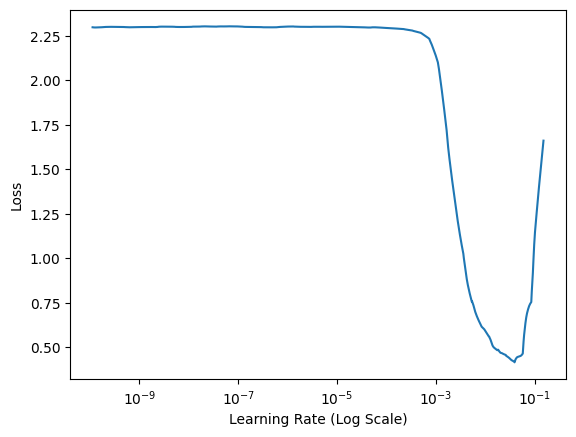

In [15]:

lrf.plot_loss()

 <div style="direction:rtl">
پاسخ سوال سوم

In [ ]:
#Defining costum callback
class validto75callback(Callback):
    def on_epoch_end(self, epoch, logs):
        if(logs.get('val_acc') > 0.75):
            print("accuracy got 75 !")
            self.model.stop_training = True

validto75callback = validto75callback()

In [ ]:
model_hoda.fit(x_train, y_train, batch_size=16 , epochs= 20, validation_split=0.2 , callbacks = [validto75callback])

Epoch 1/20
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7794 - loss: 0.7519accuracy got 75 !
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7793 - loss: 0.7489 - val_acc: 0.8950 - val_loss: 0.3261
